## Libaries

In [1]:
# Main libraries installation
!pip install geopandas owslib requests rasterio > nul

In [2]:
# Import necessary libraries
import geopandas as gpd  # Import the GeoPandas library for geospatial data
from shapely.geometry import Point  # Import the Point class from the Shapely library for geometric objects
import pandas as pd  # Import the pandas library for data manipulation and analysis
import os  # Import the os library for operating system-related functionality
import io  # Import the io library for input/output operations
import rasterio  # Import the rasterio library for working with raster data
import numpy as np  # Import the NumPy library for numerical operations
from rasterio.crs import CRS  # Import the Coordinate Reference System (CRS) class from rasterio
import json  # Import the json library for handling JSON data
import contextily as cx  # Import the contextily library for basemaps and context tiles
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library for creating visualizations
import requests  # Import the requests library for making HTTP requests
from io import BytesIO  # Import BytesIO class from io for handling binary data in-memory
import zipfile  # Import the zipfile library for working with zip archives
from matplotlib.colors import ListedColormap  # Import ListedColormap class from matplotlib.colors
from matplotlib import cm  # Import cm module from matplotlib for colormaps
import plotly.io as pio  # Import the Plotly I/O library for handling Plotly I/O
from IPython.display import Image  # Import the Image class from IPython.display for displaying images in the IPython environment
import warnings  # Import the warnings library for managing warnings

# Disable deprecation warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Data Ingestion

In [3]:
# GitHub URL for the ZIP file containing geospatial data
github_url = 'https://github.com/globalmaps/gm_ve_v1/raw/master/gm_ve_v1.zip'

# Download the ZIP file and extract the TIFF file
response = requests.get(github_url)  # Make an HTTP GET request to the GitHub URL
zip_file = zipfile.ZipFile(BytesIO(response.content))  # Create a ZipFile object from the binary content of the response

# List the contents (file names) of the ZIP file
zip_file.namelist()

['gm_ve_v1.tif']

In [4]:
# Assuming the TIFF file is named 'my_file.tif'
tiff_filename = 'gm_ve_v1.tif'

# Extract the TIFF file into a folder
with zip_file.open(tiff_filename) as tiff_file:
    with open('data/gm_ve_v1.tif', 'wb') as tmp_tiff:
        tmp_tiff.write(tiff_file.read())

## Data exploring

In [5]:
# Open the TIFF file representing forest data
forests_file = rasterio.open('data/gm_ve_v1.tif')

# Read the data from the TIFF file
forests = forests_file.read()

# Print the minimum, maximum, and the number of unique values in the forest data
print(np.amin(forests))  # Print the minimum value in the forest data
print(np.amax(forests))  # Print the maximum value in the forest data
print(len(np.unique(forests)))  # Print the number of unique values in the forest data

0
254
102


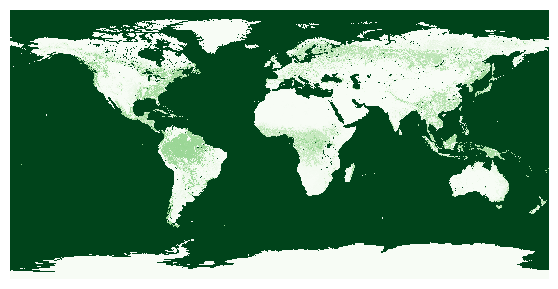

In [6]:
# Create a new figure
fig = plt.figure()

# Create an axes within the figure
ax = plt.axes()

# Set the size of the figure
fig.set_size_inches(7, 3.5)

# Display the forest data as an image using imshow
imgs = plt.imshow(forests[0],
                  cmap='Greens',  # Set the colormap to Greens
                  interpolation='nearest')  # Set the interpolation method

# Turn off axis labels
ax.axis('off')

# Show the plot
plt.show()

In [7]:
# Replace values of 254 with 0.0 in the forest data
forests[0][forests[0] == 254] = 0.0

# Get the 'Greens' colormap with 101 color levels
ourcmap = cm.get_cmap('Greens', 101)

# Generate new colors by linear interpolation, creating a smooth transition
newcolors = ourcmap(np.linspace(0, 1, 101))

# Set the background color to a custom value
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])

# Assign the custom background color to the first color level
newcolors[:1, :] = background_colour

# Create a new colormap with the modified colors
newcmp_forests = ListedColormap(newcolors)

## Data Visualization

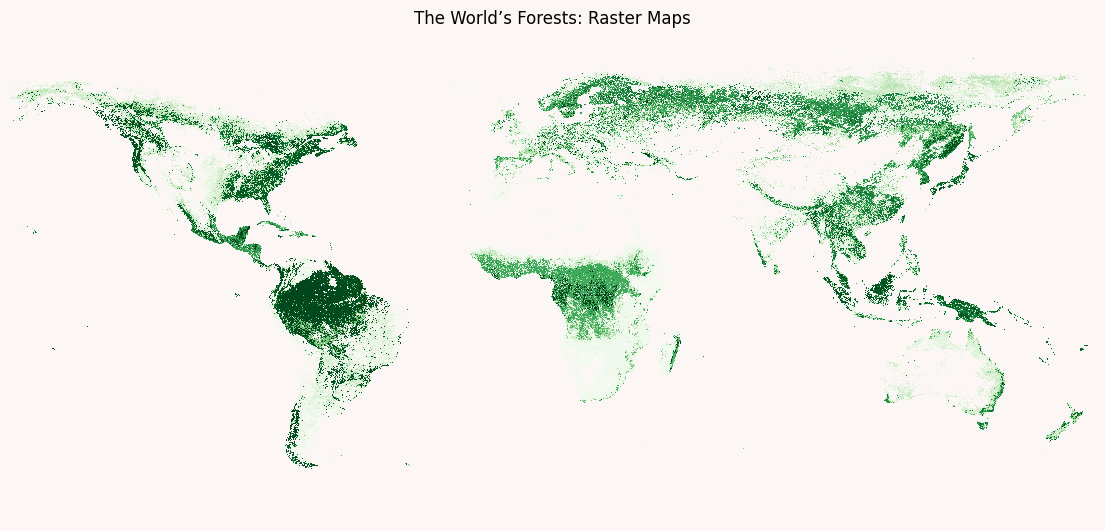

In [8]:
# Create a new figure with a specified face color
fig = plt.figure(facecolor='#FCF6F5FF')

# Create an axes within the figure
ax = plt.axes()

# Set the size of the figure
fig.set_size_inches(14, 7)

# Set the face color of the axes
ax.patch.set_facecolor('#FCF6F5FF')

# Display the modified forest data as an image using imshow
imgs = plt.imshow(forests[0],
                  cmap=newcmp_forests,  # Set the colormap to the custom colormap
                  interpolation='nearest')  # Set the interpolation method

# Set the limits of the axes
ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)

# Set the title of the plot
ax.set_title('The World’s Forests: Raster Maps')

# Turn off axis labels
ax.axis('off')

# Show the plot
plt.show()

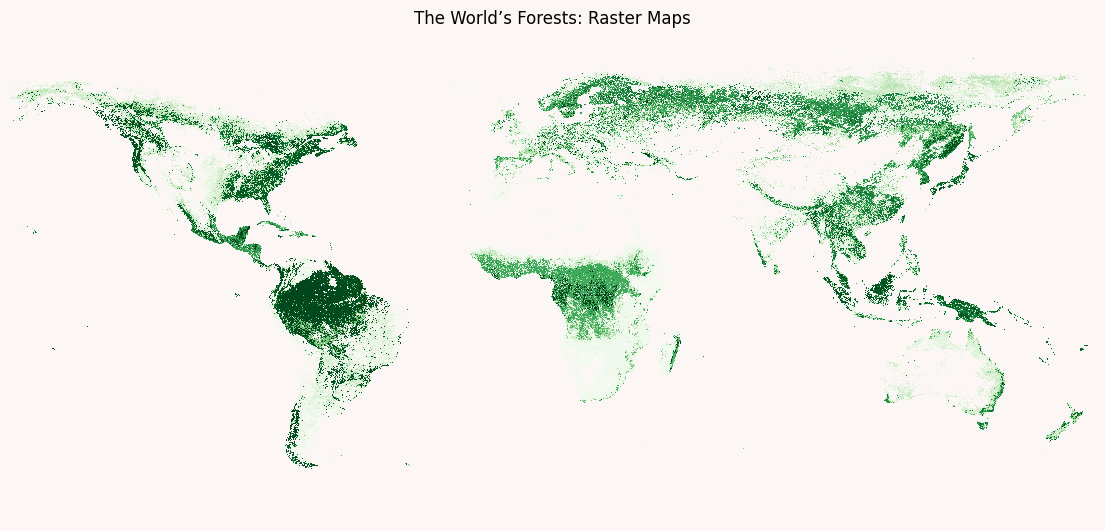

In [9]:
# Path to your PNG file
ruta_archivo_png = 'data/raster_forest.png'  # Replace with the correct path

# Display the image in the notebook
Image(filename=ruta_archivo_png)